# Project : Patients Appointment Prediction

## Introduction
This project will find the factors ( ScholarShip , location, age) that predict if the patients will show up for their appointments.The dataset is from medical appointments in Brazil. We will examine the graph to figure out how likely each patient group shows up for their appointments. In addition, we also examine what pattern can the numbers of showing up patients in the months, suggest about the patients' behaviors.
The data is found at https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
path = "D:\data_base\{}" # define the path to open the filefile = path.format('clean_showappointments.cvs')

## DATA WRANGGLING 



In [2]:
fileName = path.format('noshowappointments-kagglev2-may-2016.csv')
df = pd.read_csv(fileName)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
df.shape


(110527, 14)

 There are 110527 patients on the appointment list.

In [4]:
#colID = df.columns.get_loc('Age')
# view the index number , label , and number of unique value of each column

i, l, u = [], [], []
for index , label in enumerate(df.columns):
     i.append(index) ; l.append(label) ;u .append(df[label].nunique()) 
      
Index_NUnique = pd.DataFrame({'Index': i,'Labels' : l, 'Nunique': u}).set_index('Index')
Index_NUnique

,Labels,Nunique
Index,,
0,PatientId,62299
1,AppointmentID,110527
2,Gender,2
3,ScheduledDay,103549
4,AppointmentDay,27
5,Age,104
6,Neighbourhood,81
7,Scholarship,2
8,Hipertension,2


In [5]:
# Display the unique values of Columns Alcoholism,Diabete,Gender,Handcap,
# Hipertension, No-show, SMS_received, Scholarship
header = list(df)
selected_index = list([2]) + list(range(7,14))
selected_header = [header[x] for x in selected_index]
ubook = OrderedDict()
for h in selected_header:
    ubook[h] = tuple(df[h].unique())
uniqeV = pd.DataFrame(dict([(k,pd.Series(v)) for k, v in ubook.items()])).fillna('  ')
uniqeV

,Alcoholism,Diabetes,Gender,Handcap,Hipertension,No-show,SMS_received,Scholarship
0,0,0,F,0,1,No,0,0
1,1,1,M,1,0,Yes,1,1
2,,,,2,,,,
3,,,,3,,,,
4,,,,4,,,,


In the last column 'No Show', Yes means that the patients do not show up, and No otherwise. To avoid the confusion, the title must change into 'Show' and 1 means that the patients do show up and 0 otherwise

In [6]:
df['Show'] = df['No-show'].replace(['No','Yes'],[1, 0])
df['Show'].replace([1, 0], ['Yes','No'], inplace = True)
df.drop('No-show', axis = 1, inplace = True)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes


In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Show               object
dtype: object

In [8]:
# ScheduledDay and AppointmentDay value must be changed into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Let categorizes the age group. First, age ranges is defined by the min and max range.


In [9]:
small = df['Age'].min()
big  = df['Age'].max()
print('oldest = {} \n youngest = {}'.format(big, small))

oldest = 115 
 youngest = -1


The age -1 and 0 are  bad values, so they will be removed from data.

In [10]:
df.drop(df.query(" Age == '-1' or Age == '0'").index, inplace = True)
#check to see if -1 is still in column Age
df['Age'].isin([-1, 0]).any()

False

In [11]:
# Categorize the age
Age_Group = pd.cut(df['Age'], [0, 11, 20, 60, 120],
                        labels = ['Children', 'Teen', 'Adult', 'Senior'])
#insert Age_Group column next to Age
ID = df.columns.get_loc('Age') + 1
df.insert(loc = ID, column = 'AgeGroup', value = Age_Group)


In [12]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,AgeGroup,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,Senior,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,Adult,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,Senior,MATA DA PRAIA,0,0,0,0,0,0,Yes


In [13]:
#check for null value
df.isnull().sum().any()

False

In [14]:
#check if there is any duplicated valueS
sum(df.duplicated())

0

## Exploratory Data Analysis
To figure out how likely the patients show up for their appointment, we compare their show up proprotion in each group

In [15]:
# return a table that show the appointment occurance of the patient group
def ShowProportion(dframe, colName):
    
    if colName == 'AppointmentDay':
        t = pd.crosstab(dframe[colName].dt.month, dframe['Show'], 
                            rownames = ['AppointmentMonth'],normalize = 'index')*100
    else:
        t = pd.crosstab(dframe[colName], dframe['Show'], normalize = 'index')*100
    # change order of result columns
    new_colnames =['Yes', 'No']
    #table = t.reindex_axis(new_colnames, axis = 1)
    #method 2 is below
    table = t.reindex(columns = new_colnames)
    return table

In [16]:
# This gives stacked bar graph for appointment show up of the patient group
def Stacked_Bar(table):
    ax = table.plot.bar(stacked = True)
    name = table.index.name
    #string = 'Rate of Show/No_Show by {}'.format(name)
    ax.set(title = 'Rate of Show/No_Show by {}'.format(name),
        xlabel = name, ylabel = 'Show/No-show raters in %',
        ylim = [0, 100])
    ax.legend(['Show','No-show'],  loc = 'center left', bbox_to_anchor=(1, 0.5))

In [17]:
# give the pie chart
def Pie(table):
    colors  = ['lightcoral', 'lightskyblue']
    name = table.index.name
    # m is amount of sub graphs we need
    m = len(table.index.values)
    fig ,axes = plt.subplots( m   , 2 ,figsize = (10, 10))
    for i, (idx, row) in enumerate(table.iterrows()):
        ax = axes[i // 2, i % 2]
        ax.pie(row, labels = row.index, colors = colors, autopct='%1.1f%%',
          startangle=140)
        ax.set_title('{} {}'.format(name, idx))
    # remove unused subplot
    for i in range(m):
        for y in range (2):
            axes[-i  ,-y ].axis('off')
    fig.subplots_adjust(wspace = .6)
    fig.subplots_adjust(hspace = .6)

### Which group(age, living location) of patients should have the priorty to make appointment?

What is the group of patient (agegroup, or living location) most likely show up for their appointments? Should they have the first priory to make appointment?


This seems that old peole mostlikely show ups for their appointment. On the otherhand, Adolescence motlikely skip their appointments.

In [18]:
# Let investigate Age Group
AgeTable = ShowProportion(df, 'AgeGroup')
AgeTable

Show,Yes,No
AgeGroup,,
Children,79.298994,20.701006
Teen,74.285954,25.714046
Adult,79.263697,20.736303
Senior,84.788989,15.211011


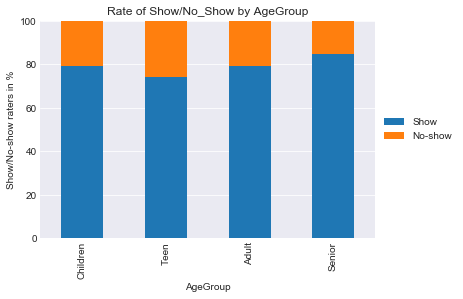

In [19]:
# Graph AgeGroup patients
Stacked_Bar(AgeTable)

This seems that seniors mostt likely show ups for their appointment. On the otherhand, teens most likely skip their appointments.

In [20]:
# Give the tabele for Neighboorhood type patient
Neigh_table = ShowProportion(df, 'Neighbourhood') 

In [21]:
Neigh_table.query("Yes == 100 or No == 100 ")

Show,Yes,No
Neighbourhood,,
ILHAS OCEÂNICAS DE TRINDADE,0.0,100.0
PARQUE INDUSTRIAL,100.0,0.0


In Parque Industial and ILHAS OCEÂNICAS DE TRINDADE, the show up and do not show up proportion is 100% percent respectively. This indicates the need for more data collection.

### How effective is the government Scholarship?

How often do the welfare patients show up for their appointments, compared to other groups? What can the result suggest about the effectiveness of the government welfare?

In [22]:
# Give scholarship tabel
sTable = ShowProportion(df, 'Scholarship')

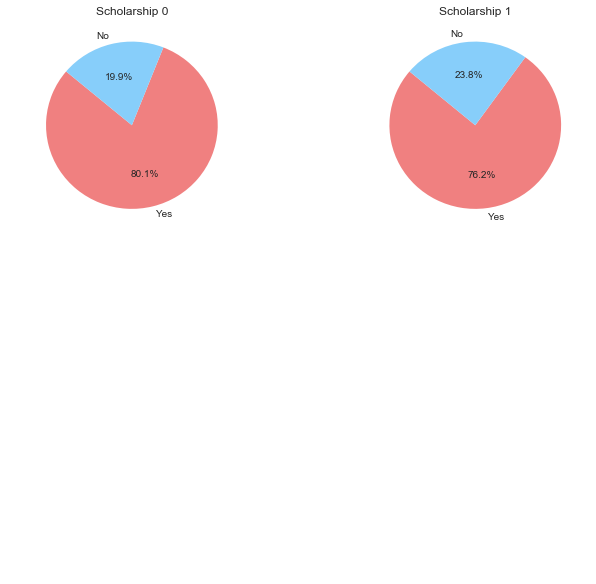

In [23]:
Pie(sTable)

The difference suggests that nonhealthcare patients show up for their appointment as often as the health care ones does.
It is around 4 percents. 

### What is the month that has the highest show up rate?

In [24]:
Mtable = ShowProportion(df, 'AppointmentDay')
Mtable 

Show,Yes,No
AppointmentMonth,,
4,80.412371,19.587629
5,79.157822,20.842178
6,81.414275,18.585725


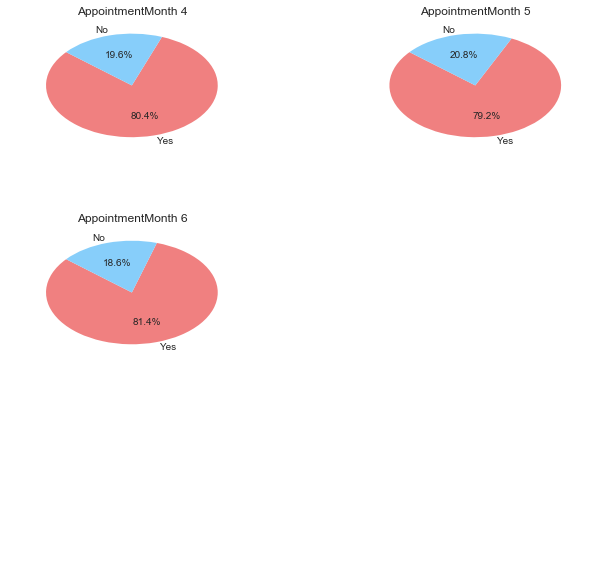

In [25]:

Pie(Mtable)       

In June the hospital has the highest occurance rates compared to April and May

## Conclusion

In [26]:
#counting Data collection for PARQUE INDUSTRIAL, and ILHAS OCEÂNICAS DE TRINDADE 
g = df.query('Neighbourhood == "PARQUE INDUSTRIAL" or Neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')
g.groupby(['Neighbourhood'])['Show'].count()

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    2
PARQUE INDUSTRIAL              1
Name: Show, dtype: int64

The Age Group factor can be used to predict how likely patients arrive for their appointment. The show up proportion of old people is highest among other group. This suggests that old people care more about their health, so they are less likely to skip their appointment. Perhaps they should have the first priority to make the appointment 
The healthcare and non-healthcare proportion is approximately equal. The diffrence between non healthcare patients and non-healthcare is 0.03929148307007313
Although this may imply that the government program is not quite effective, more information must be provided to prove the effectiveness of the program. 
In June , show-up proportion is highest.  Perhaps this is when people have to visit the doctors. 
For the Location Neighbourhood, it seems to be inconclusive, because  Parque Industial and ILHAS OCEÂNICAS DE TRINDADE have one hundred percent show and no show proportion respectively . There are only three data values avaliable for these location. ILHAS and parque have two and one appointment respectively. This means that is a need for more data collection and the different approach so analyze the location factor 
